# ASTR 330 Stats background: the Central Limit Theorem #

**WIC** - Edited out of some stats notebooks originally written for the UM-D ASTR research group. Notes somewhat sparse.

To the student: this is pretty much verbatim from an informal presentation I gave to some UM-D astronomers during a previous ASTR group meeting. You should feel free to download and play with this yourself!  

## 001 - the Central Limit Theorem

Here we generate random numbers under decidedly non-gaussian error distributions, and find out what happens to the distribution of their sum. This represents what might happen when a large number of effects happen in sequence to some nominally undisturbed random variable.

First we set up for analysis:

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
# Snazzy R-type plot style
try:
    plt.style.use('ggplot')
except:
    blah = 1

As usual, we use the following line to make matplotlib figures show up in our notebook. You don't need the following line if you are doing all this from the command line.

In [3]:
%matplotlib inline

Now we're ready to start!

## Setting up "measurement" variables

NOTE - for my own convenience writing this, I will often use comments (starting with #) to clarify points rather than using separate text boxes. This has the advantage that you should be able to run those lines as-is in your own ipython command line, notebook, etc.

In [4]:
# We'll make nPoints samples for each distribution:
nPoints = 5000   

In [5]:
# Note to notebook users: just hit "play" again on this box to generate a new sample.
#
# Let's generate the random deviates. 
xUnif = np.random.uniform(size=nPoints)
xPow = np.random.power(3.5, size=nPoints)

Text(0.5,0.85,'$f \\propto x^{2.5}$')

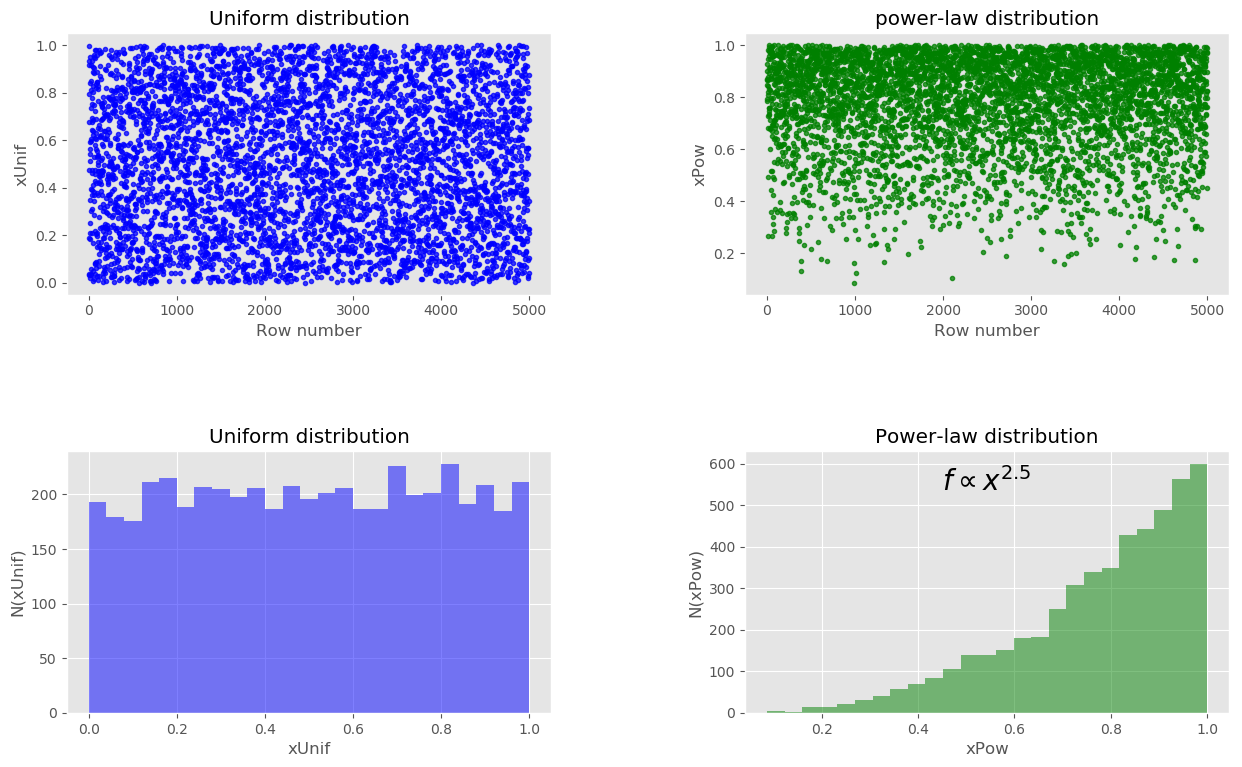

In [6]:
# Let's plot the histograms of those distributions:
plt.figure(1, figsize=(15,9))
plt.clf()

# quick bit of pylab to separate the two panels in the plot a bit more
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# First the uniform distribution...
plt.subplot(221)
plt.plot(xUnif, 'b.', alpha=0.75)
plt.xlabel('Row number')
plt.ylabel('xUnif')
plt.title('Uniform distribution')
plt.grid()

plt.subplot(223)
plt.hist(xUnif, bins=25, color='b', alpha=0.5)
plt.xlabel('xUnif')
plt.ylabel('N(xUnif)')
plt.title('Uniform distribution')

# ... then the power-law distribution
plt.subplot(222)
plt.plot(xPow, 'g.', alpha=0.75)
plt.xlabel('Row number')
plt.ylabel('xPow')
plt.title('power-law distribution')
plt.grid()

plt.subplot(224)
plt.hist(xPow, bins=25, color='g', alpha=0.5)
plt.xlabel('xPow')
plt.ylabel('N(xPow)')
plt.title('Power-law distribution')

# Note for later - matplotlib understands LaTeX formatting, as in this annotation:
plt.annotate("$f \propto x^{2.5}$", (0.5,0.85), xycoords='axes fraction', ha='center', fontsize=20)


## Drawing repeated samples from these distributions

OK those look pretty realistic. Now let's take the average of m points in each case, where we let m get larger and larger.

We'll do this by drawing m samples from the same distribution in a loop. First we initialise the arrays that will hold the averages, then we populate them by adding m samples in each case. Finally we divide by the number of samples. So:


In [7]:
# First set up the holding-arrays for each distribution:
nPoints = 5000
AvgUnif = np.zeros(nPoints)
AvgPowr = np.zeros(nPoints)

# Set the power-law exponent (>= 1, where f = x^(expon-1)  )
Expon = 3.5

# Now determine how many samples we want to take. We'll start with 1 just to verify that
# we understand what our routine is doing:
mSamples = 1

# Now we populate them. 
for iSample in range(mSamples):
    
    # Generate the m'th sample of each distribution...
    ThisUnif = np.random.uniform(size=np.size(AvgUnif))
    ThisPowr = np.random.power(Expon,size=np.size(AvgPowr))

    # ... and add them on to the master arrays.
    AvgUnif = AvgUnif + ThisUnif
    AvgPowr = AvgPowr + ThisPowr
    
# Now the AvgUnif and AvgPowr contain the sum of m samples from each distribution. To take 
# the average, just divide by the number of samples
AvgUnif = AvgUnif / np.float(mSamples)
AvgPowr = AvgPowr / np.float(mSamples)



**NOTE:** it's always a good idea to ensure that your more complicated version correctly reproduces simple cases before jumping off into more intereating cases. That's why I set mSamples = 1 in the code snippet above.

Text(0.5,0.85,'$f \\propto x^{2.5}$')

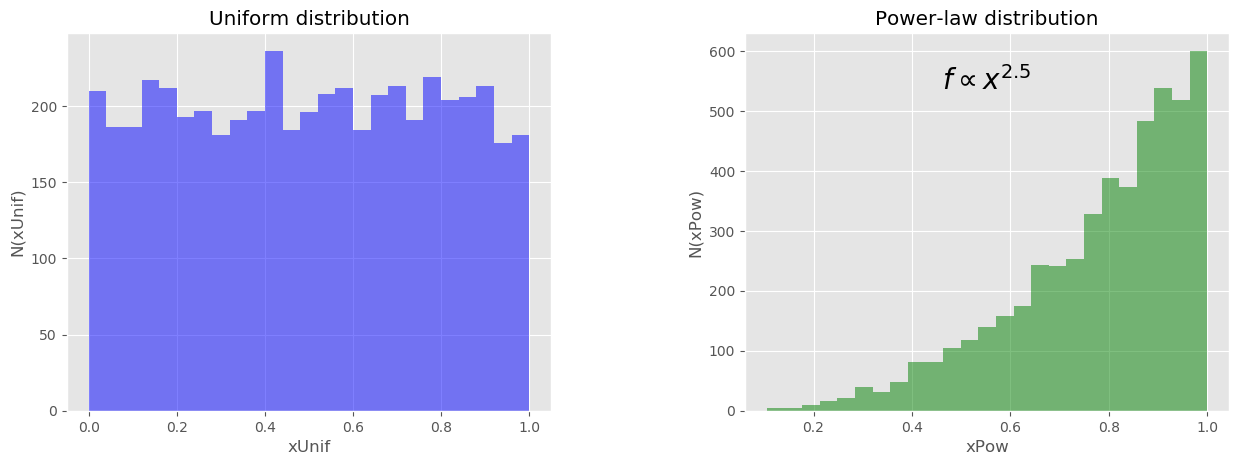

In [8]:
# Let's re-do the plot just to see if that was successful:
plt.figure(2, figsize=(15,5))
plt.clf()

# quick bit of pylab to separate the two panels in the plot a bit more
plt.subplots_adjust(wspace=0.4)

# First the uniform distribution...
plt.subplot(121)
plt.hist(AvgUnif, bins=25, color='b', alpha=0.5)
plt.xlabel('xUnif')
plt.ylabel('N(xUnif)')
plt.title('Uniform distribution')

# ... then the power-law distribution
plt.subplot(122)
plt.hist(AvgPowr, bins=25, color='g', alpha=0.5)
plt.xlabel('xPow')
plt.ylabel('N(xPow)')
plt.title('Power-law distribution')

# Note for later - matplotlib understands LaTeX formatting, as in this annotation:
#
# NOTE - this time we allow the exponent to be passed into the label as a variable! 
plt.annotate("$f \propto x^{%.1f}$" % (Expon-1), (0.5,0.85), xycoords='axes fraction', ha='center', fontsize=20)



In [9]:
# OK good. mSamples = 1 looks just like we'd expect. What about the average of two samples?
# First set up the holding-arrays:
nPoints = 5000
AvgUnif = np.zeros(nPoints)
AvgPowr = np.zeros(nPoints)

# Power-law exponent (>= 1)
Expon = 3.5

# Now determine how many samples we want to take. We'll start with 1 just to verify that
# we understand what our routine is doing:
mSamples = 2

# Now we populate them. 
for iSample in range(mSamples):
    
    # Generate the m'th sample of each distribution...
    ThisUnif = np.random.uniform(size=np.size(AvgUnif))
    ThisPowr = np.random.power(Expon,size=np.size(AvgPowr))

    # ... and add them on to the master arrays.
    AvgUnif = AvgUnif + ThisUnif
    AvgPowr = AvgPowr + ThisPowr
    
# Now the AvgUnif and AvgPowr contain the sum of m samples from each distribution. To take 
# the average, just divide by the number of samples
AvgUnif = AvgUnif / np.float(mSamples)
AvgPowr = AvgPowr / np.float(mSamples)

Text(0.05,0.85,'$f \\propto x^{2.5}$')

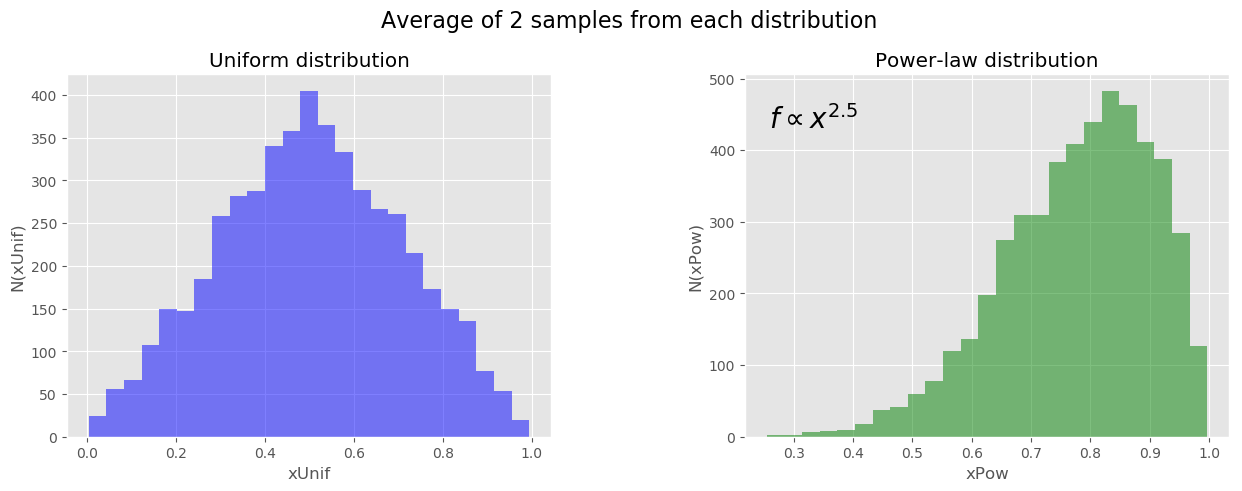

In [10]:
# Let's re-do the plot just to see if that was successful:
plt.figure(2, figsize=(15,5))
plt.clf()

# quick bit of pylab to separate the two panels in the plot a bit more
plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.85)

# First the uniform distribution...
plt.subplot(121)
plt.hist(AvgUnif, bins=25, color='b', alpha=0.5)
plt.xlabel('xUnif')
plt.ylabel('N(xUnif)')
plt.title('Uniform distribution')

# ... then the power-law distribution
plt.subplot(122)
plt.hist(AvgPowr, bins=25, color='g', alpha=0.5)
plt.xlabel('xPow')
plt.ylabel('N(xPow)')
plt.title('Power-law distribution')

# Let's add an overall title:
plt.suptitle("Average of %i samples from each distribution" % (mSamples), fontsize=16)

# Note for later - matplotlib understands LaTeX formatting, as in this annotation:
#
# NOTE - this time we allow the exponent to be passed into the label as a variable! 
plt.annotate("$f \propto x^{%.1f}$" % (Expon-1), (0.05,0.85), xycoords='axes fraction', ha='left', fontsize=20)


In [11]:
# That's very interesting... already the two samples from the uniform distribution looks like 
# it might be tending to a familiar distribution...

# It's tedious to type or paste out all that code, so before proceeding further, let's 
# encapaulate the generation and plotting into methods, like so:

In [12]:
def DrawFromRandoms(mSamples=1, nPoints=5000, Expon=3.5, methRand=np.random.power):
    
    """Drawn mSamples samples from distributions of interest.
    
    Example call: Unif, Rand = DrawFromRandoms(5,1000,2.5)"""
    
    # First set up the holding-arrays:
    AvgUnif = np.zeros(nPoints)
    AvgPowr = np.zeros(nPoints)
    
    # Accumulate the samples
    for iSample in range(mSamples):
        AvgUnif += np.random.uniform(size=nPoints)
        try:
            AvgPowr += methRand(Expon, size=nPoints)
        except:
            AvgPowr += methRand(nPoints)  # for one-parameter methods
        
    # return the averages
    return AvgUnif / np.float(mSamples), AvgPowr/np.float(mSamples)

In [13]:
def ShowRandoms(Unifs, Powrs, mSamples=1, Expon=3.5, nBins=25):
    
    """Plots the draws from each distribution. Unifs, Powrs are the 
    data arrays to be histogrammed and plotted.
    
    Note that mSamples and Expon are used purely for labeling the graphs."""
    
    plt.figure(figsize=(15,5))
    
    plt.clf()

    # quick bit of pylab to separate the two panels in the plot a bit more
    plt.subplots_adjust(wspace=0.4, top=0.85)

    # First the uniform distribution...
    plt.subplot(121)
    plt.hist(Unifs, bins=nBins, color='b', alpha=0.5)
    plt.xlabel('xUnif')
    plt.ylabel('N(xUnif)')
    plt.title('From uniform distribution')
    plt.grid()
    
    # ... then the power-law distribution
    plt.subplot(122)
    plt.hist(Powrs, bins=nBins, color='g', alpha=0.5)
    plt.xlabel('xPow')
    plt.ylabel('N(xPow)')
    plt.title('From power-law distn')
    plt.grid()
    
    # Note for later - matplotlib understands LaTeX formatting, as in this annotation:
    #
    # NOTE - this time we allow the exponent to be passed into the label as a variable! 
    plt.annotate("$f \propto x^{%.1f}$" % (Expon-1), \
                 (0.05,0.95), xycoords='axes fraction', ha='left', fontsize=18, va='top')

    # Last but not least, the overtitle.
    plt.suptitle("Average of %i samples from each distribution" % (mSamples), fontsize=16)


    

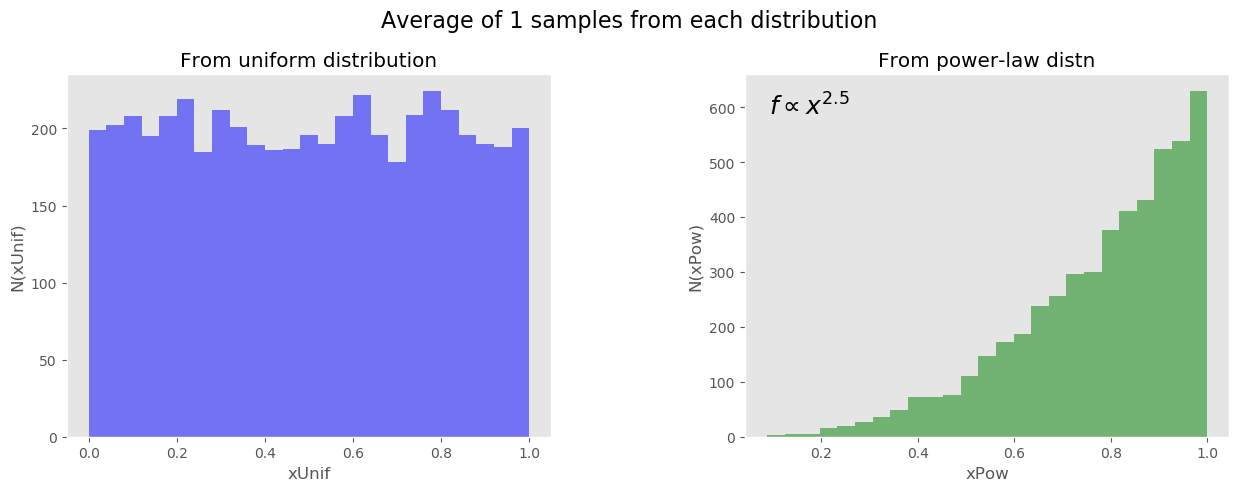

In [14]:
# Let's try this
aUnif, aPowr = DrawFromRandoms(1, 5000, Expon=3.5)
ShowRandoms(aUnif, aPowr,1,3.5)

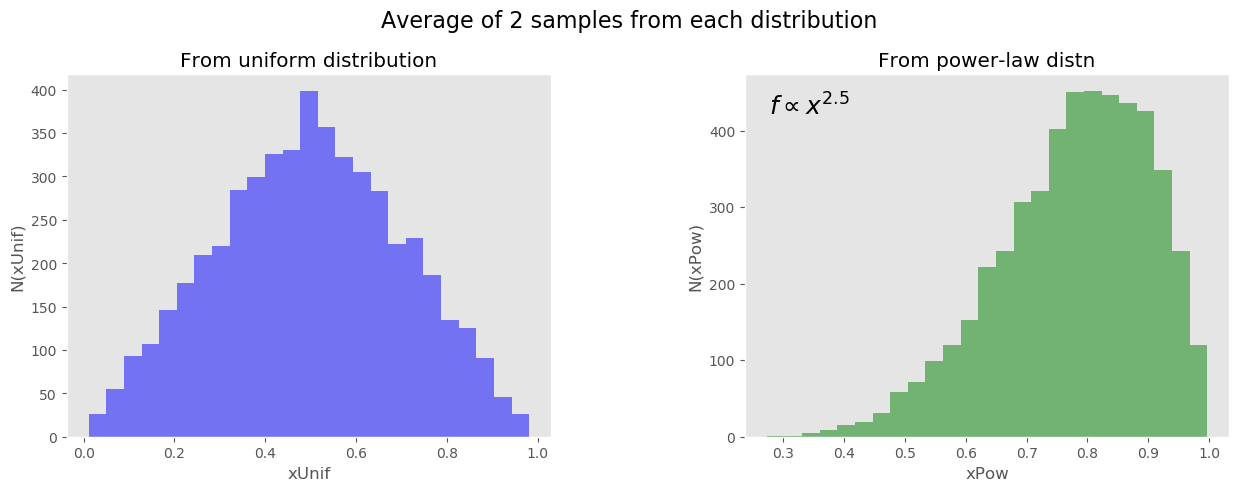

In [15]:
# Let's try this
aUnif, aPowr = DrawFromRandoms(2, 5000, Expon=3.5)
ShowRandoms(aUnif, aPowr,2,3.5)

In [16]:
# Now we can do the interesting part - test higher numbers of samples. What about 5 samples?

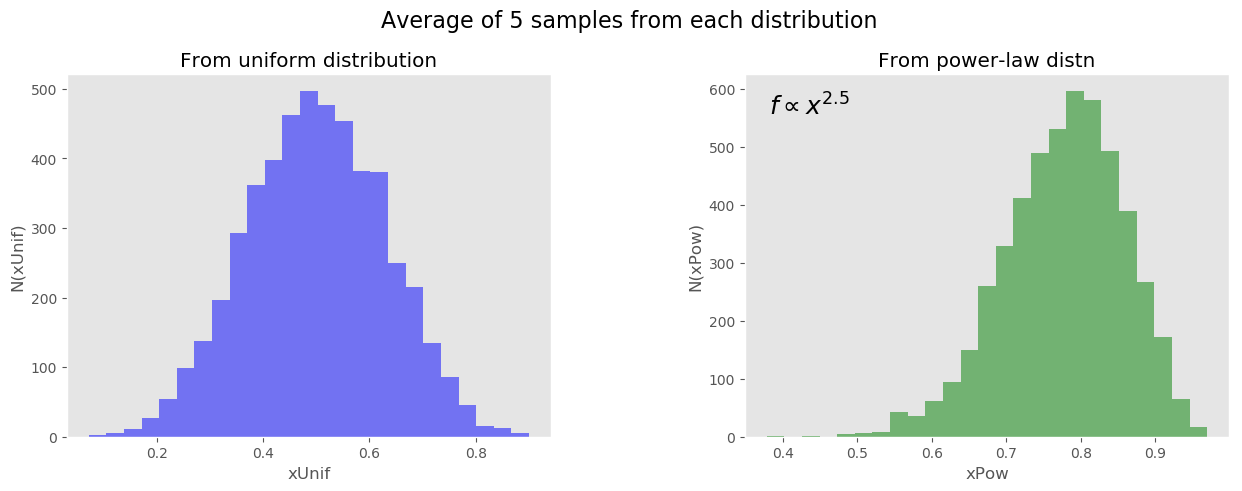

In [17]:
aUnif, aPowr = DrawFromRandoms(5, 5000, Expon=3.5)
ShowRandoms(aUnif, aPowr,5,3.5)

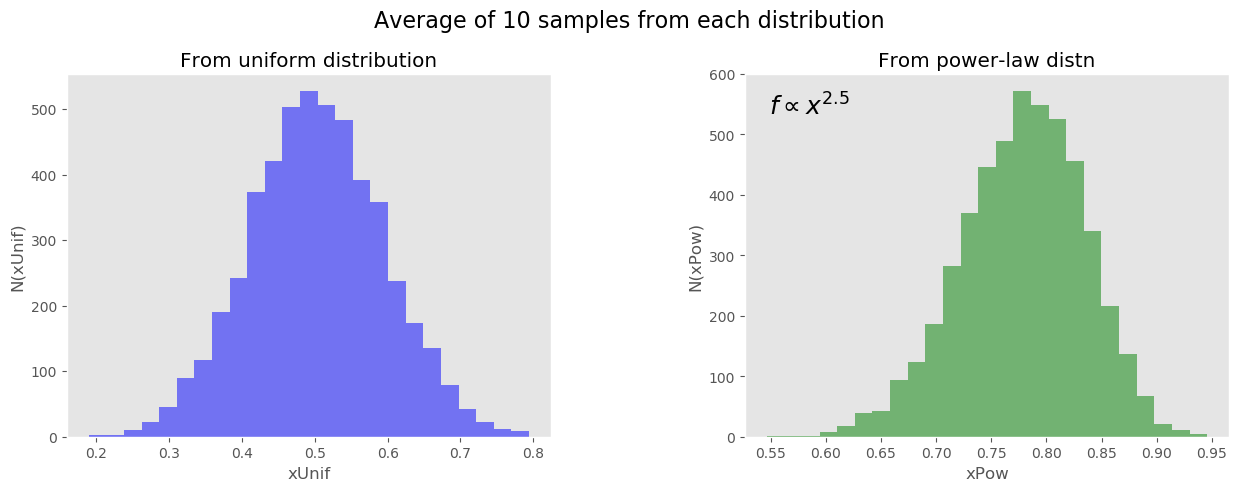

In [18]:
# What about 10?
aUnif, aPowr = DrawFromRandoms(10, 5000, Expon=3.5)
ShowRandoms(aUnif, aPowr,10,3.5)

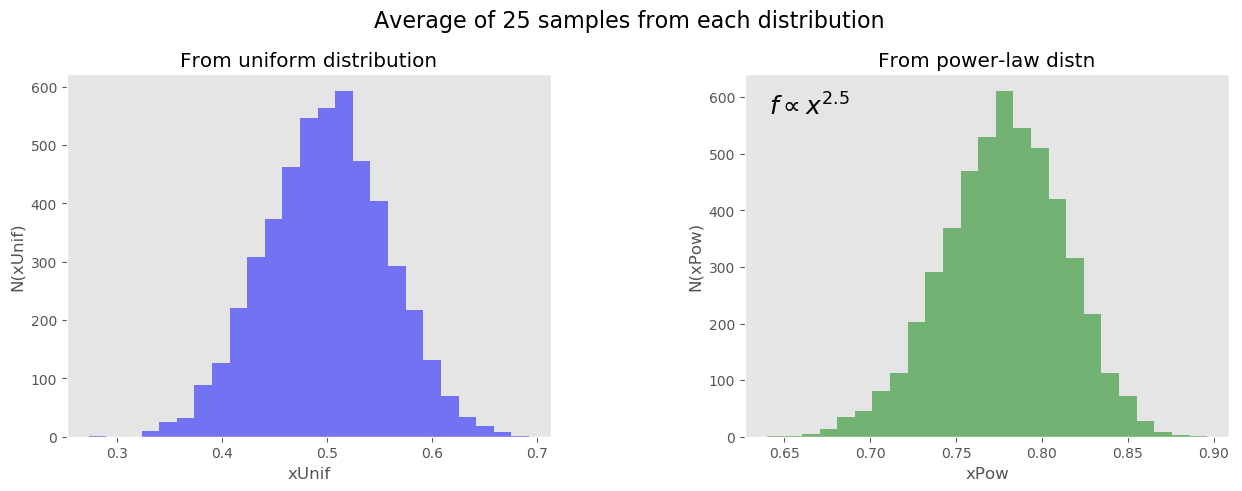

In [19]:
# What about a large number of samples?
aUnif, aPowr = DrawFromRandoms(25, 5000, Expon=3.5)
ShowRandoms(aUnif, aPowr,25,3.5)


## To what distribution are these samples tending?

Notice that the form of the uniform samples are already becoming rather centrally-peaked with a handful of samples, and the power-law distribution eventually follows suit (although it takes longer).

Now we take a look at some statistics of the resulting sample-sets and use them to overplot a well-known distribution - a 1D Gaussian...

In [20]:
def RetGauss(x, Mu, Sigma):
    
    """1D normalized gaussian - will be useful later"""
    
    NormFac = 1.0/np.sqrt(2.0*np.pi*Sigma**2)
    
    return NormFac * np.exp(-0.5*(x-Mu)**2/Sigma**2)

In [21]:
# Now let's plot those histograms again, this time with a normal distribution overplotted.

# Rather than re-calculate these statistics each time, we'll incorporate them into our 
# plotting routine, like so:

In [22]:
def ShowRandoms2(Unifs, Powrs, mSamples=1, Expon=3.5, nBins=25, ShowGauss=False, \
                 NoTitle=False, xMin=1e6, xMax=-1e6, forcedStddev=True, \
                 sTitle='From power-law distribution'):
    
    """Plots the draws from each distribution. Unifs, Powrs are the 
    data arrays to be histogrammed and plotted.
    
    if ShowGauss is set, the histograms are normalized to unit area.
    
    set xMin < xMax to force those limits for both the histogram and plots
    
    if forcedStddev, then the stddev for the gaussian is only evaluated over the plot range.
    
    Change sTitle to alter the bottom title."""
    
    plt.figure(1, figsize=(15,5))
    plt.clf()

    # quick bit of pylab to separate the two panels in the plot a bit more
    plt.subplots_adjust(wspace=0.4, top=0.85)

    # First the uniform distribution...
    plt.subplot(121)
    plt.hist(Unifs, bins=nBins, color='b', alpha=0.5, normed=ShowGauss)
    plt.xlabel('xUnif')
    plt.ylabel('N(xUnif)')
    plt.grid()
    if not NoTitle:
        plt.title('From uniform distribution')
    
    # Overplot the gaussian if user has asked
    if ShowGauss:
        xFine = np.linspace(np.min(Unifs), np.max(Unifs), 500)
        yGauss = RetGauss(xFine, np.mean(Unifs), np.std(Unifs) )

        # Scale the gaussian by the maximum histogram value:
        plt.plot(xFine, yGauss, 'r-', lw=2, zorder=5)   
    
        # Let's write the mean, stddev of the estimated normal 
        # distribution right into the figure:
        sAnnoU = "$\mathcal{N}(%.2f,%.3f)$" % (np.mean(Unifs), np.std(Unifs))
        plt.annotate(sAnnoU, (0.05,0.95), ha='left', va='top', color='r', \
                     xycoords='axes fraction', fontsize=18)
        
    
    # A bit more syntax - keep the ranges with nonzero points
    plt.xlim(np.min(Unifs)*0.95, np.max(Unifs)*1.05)
    
    # ... then the power-law distribution
    plt.subplot(122)

    # allow limits in the case of the cauchy
    xLo = np.min(Powrs)
    xHi = np.max(Powrs)
    if xMin < xMax:
        xLo = np.copy(xMin)
        xHi = np.copy(xMax)
    
    plt.hist(Powrs, bins=nBins, color='g', alpha=0.5, normed=ShowGauss, range=(xLo, xHi))
    plt.xlabel('x from nonuniform')
    plt.ylabel('N(x from nonuniform)')
    plt.grid()
    if not NoTitle:
        plt.title(sTitle)
     
    # Overplot the gaussian if user has asked
    if ShowGauss:
        xFine = np.linspace(xLo, xHi, 5000)
        
        muGauss = np.mean(Powrs)
        stdGauss = np.std(Powrs)
        if forcedStddev:
            bRange = (Powrs >= xLo) & (Powrs < xHi)
            muGauss = np.mean(Powrs[bRange])
            stdGauss = np.std(Powrs[bRange])
        
        yGaussPow = RetGauss(xFine, muGauss, stdGauss )
        plt.plot(xFine, yGaussPow, 'b-', lw=2, zorder=5, alpha=0.75)   
        
        # Let's write the mean, stddev of the estimated normal 
        # distribution right into the figure:
        sAnnoP = "$\mathcal{N}(%.2f,%.3f)$" % (muGauss, stdGauss)
        plt.annotate(sAnnoP, (0.05,0.95), ha='left', va='top', color='b', \
                     xycoords='axes fraction', fontsize=18)
        
    # A bit more syntax - keep the ranges with nonzero points
    if xMin > xMax:  # [sic]
        plt.xlim(np.min(Powrs)*0.95, np.max(Powrs)*1.05)
    
    # Note for later - matplotlib understands LaTeX formatting, as in this annotation:
    #
    # NOTE - this time we allow the exponent to be passed into the label as a variable! 
    #plt.annotate("$f \propto x^{%.1f}$" % (Expon-1), \
    #             (0.05,0.95), xycoords='axes fraction', ha='left', fontsize=18, va='top')

    # Last but not least, the overtitle.
    plt.suptitle("Average of %i samples from each distribution" % (mSamples), fontsize=16)



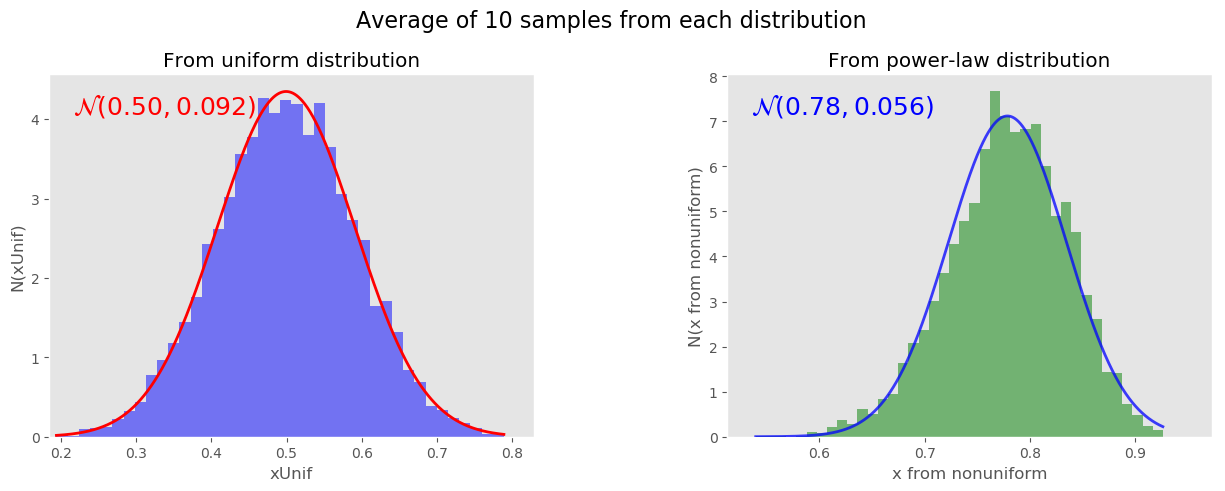

In [23]:
aUnif, aPowr = DrawFromRandoms(10, 5000, Expon=3.5)
ShowRandoms2(aUnif, aPowr, 10, 3.5, ShowGauss=True, nBins=40)

And so we are finding...

## When independent random deviates are added together, the resulting sum tends to a Gaussian distribution as more and more deviates are summed.

This is one way of stating the ** *Central Limit Theorem.* ** Notice a few interesting features:

1. Although the generating distributions were ** *highly* ** non-gaussian, and in one case very asymmetric, the average and standard deviation are both still meaningful descriptions.

2. When we use $(\mu, \sigma$) to describe our measurements in this way, we have a mental picture of a Gaussian distributed about the mean $\mu$ with standard deviation $\sigma$. Looking at the 10-sample figure above, notice that this really is a meaningful way to proceed - IF we are working with a sum that is sufficiently large that the Gaussian is within shouting distance of the true distribution!

3. Although we have not proven the CLT rigorously, it can be shown analytically that $\Sigma_i x_i \rightarrow \mathcal{N}(\mu, \sigma)$~for a fairly general set of conditions. Most grad-level statistics books (and a few undergrad books like Riley, Hobson and Bence) have some discussion of this.

4. There is no requirement that each of the random variates being summed even comes from the same distribution.

5. There are much deeper reasons for Gaussians to be so central to probability that involve concepts like Maximum Entropy. We may see those later in the semester if they become relevant. For now we'll concentrate on pragmatic issues. One of which is: 

6. The CLT does not apply to all situations!! For example, if the measurement we are making is not the result of a chain of processes added in sequence but rather a multiple, then quite a different form is obtained.

7. Nevertheless, **the averaging behavior we have shown above is why Gaussians are so central to data analysis** in the Physical sciences - under a wide range of conditions, we can recast our discussion slightly and say that:



### [Likelihood 1]: the Likelihood of observing deviation (x - $\mu$) from the "mean" is described by a Gaussian about $\mu$ with standard deviation $\sigma$

# A few caveats / things to watch out for 

### 1. Averaging destroys information.

Whether you actually ** *want* ** to erase the pdf of the original measurement in this way depends on your situation. If you want to (say) fit a straight line to points, then it will make your life much easier if those points you are fitting do have a distribution you understand. In that instance, it is the p.d.f. of the parameters of the straight line that interest you, **not** the pdf of the individual measurements (remind me to draw this on the board if it's unclear here).

On the other hand, if your scientific interest is to determine the shape of the pdf of the measurement itself, then averaging lots of measurements together will hide the pdf you actually want to measure. Be sure you're doing the right analysis for the problem you actually want to solve!

### 2. Be careful not to over-interpret, particularly in the tails of the distribution. 

Not only does the "rate" at which the distributions tend to a Gaussian depend on the distributions themselves (see below), but it also differs for different parts of the distribution! In particular, the tails become Gaussian-like rather more slowly than the center of the distribution. 

This is why stating that a result only occurs less than N% of the time by pure chance under the Gaussian assumption - can be dangerous. The tails of your resulting distribution might not be Gaussian yet, which means inferences on probability that assume the Gaussian distribution have been reached, may not be valid. Beware $3\sigma$ results!! 

As a general rule, interpreting results out in the tails of distributions just based on the functional form of the distribution is a recipe for spurious results. Monte Carlo techniques are nearly always better (assuming the Monte Carlo simulation has been properly set up so that all regions of parameter space really can be reached...).

### 3. Not all distributions obey the Central Limit Theorem.

Formally, the second moment (the variance, or $\sigma^2$) of the parent distribution has to be finite for the CLT to hold. Distributions that do not have a well-defined variance do not tend to a Gaussian as samples are summed. A famous example of this is the Cauchy or Lorentz distribution (resonance lines in spectra are Lorentzian), e.g.

\begin{eqnarray}
    p(x) & = & \frac{1}{\pi \gamma\left[1 + \left( \frac{x-x_0}{\gamma} \right)^2\right]} \\
    & = & \frac{\gamma}{\pi\left[ \gamma^2 + \left(x-x_0\right)^2\right]}
\end{eqnarray}

### 3.1. trying the Cauchy (or "Lorentz") distribution ###

Standard numpy has a Cauchy random number generator. Let's try using this as an example and see what happens.

In [24]:
#help(np.random.standard_cauchy)

Text(0.5,1,'Samples from a Cauchy/Lorentz distribution')

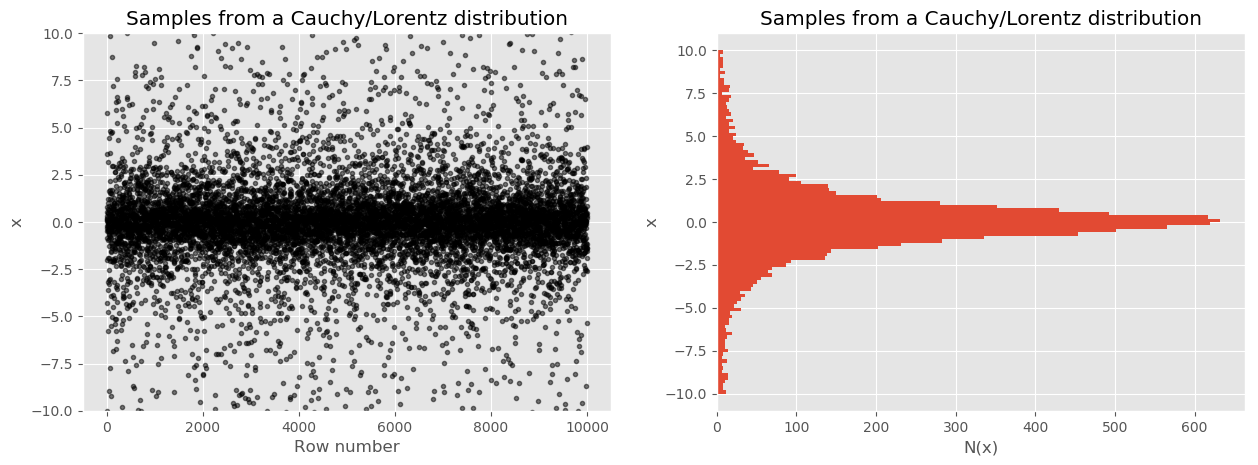

In [25]:
# let's familiarize ourselves with this distribution:
xCauchy = np.random.standard_cauchy(10000)

# set up a plotting range
xLimsCauchy = (-10., 10.)

plt.figure(15, figsize=(15,5))
plt.clf()
plt.subplot(121)
plt.plot(xCauchy, 'k.', alpha=0.5)
plt.xlabel('Row number')
plt.ylabel('x')
plt.ylim(xLimsCauchy)
plt.title('Samples from a Cauchy/Lorentz distribution')

plt.subplot(122)
plt.hist(xCauchy, 100, range=xLimsCauchy, orientation='horizontal')
plt.ylabel('x')
plt.xlabel('N(x)')
plt.title('Samples from a Cauchy/Lorentz distribution')

... which looks like it might indeed average down to a Gaussian, since this looks reasonably centrally peaked. Let's see what does happen:

Cauchy: min -94722.91, max 200873.98, stddev 1032.16


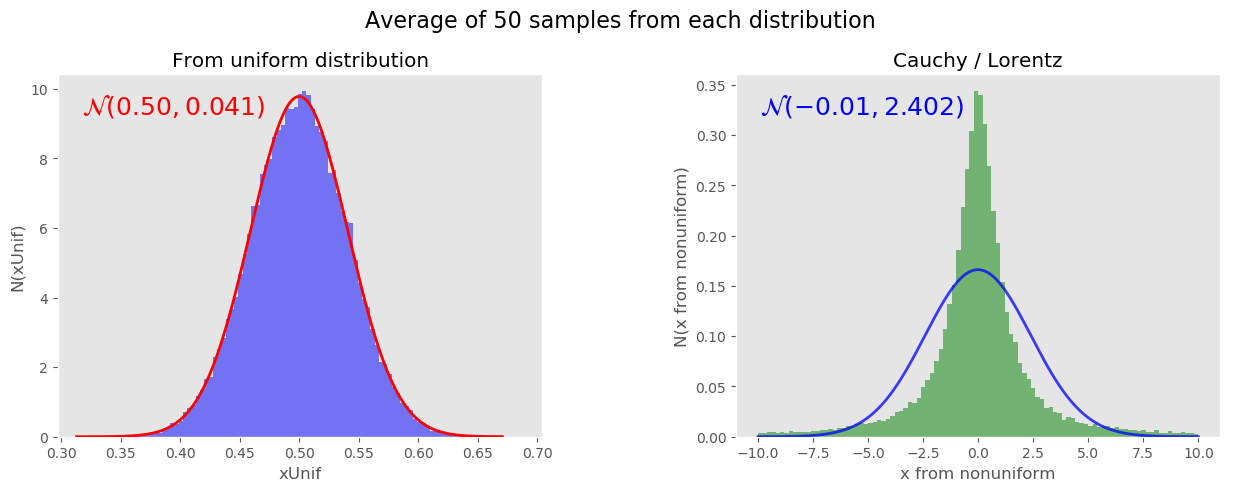

In [26]:
nPoints = 50000
mSamples = 50
aUnifs, aCauchy = DrawFromRandoms(mSamples, nPoints, methRand=np.random.standard_cauchy)


print "Cauchy: min %.2f, max %.2f, stddev %.2f" % (np.min(aCauchy), np.max(aCauchy), np.std(aCauchy))
ShowRandoms2(aUnifs, aCauchy, mSamples, 3.5, ShowGauss=True, nBins=100, xMin=-10, xMax=+10, \
             forcedStddev=True, sTitle='Cauchy / Lorentz')

... and, indeed, the Cauchy / Lorentz samples do not tend to a Gaussian even for large numbers of points in the averages.

# Some miscellaneous notes

**1 - How quickly do the averages tend to this gaussian?** Let's walk through 2, 3, 4, 5 samples and see - we expect the rapidity to tend to gaussian should be distribution-dependent.

The samples from the Uniform distribution are already close to gaussian within 3 or 4 samples, while (as we might expect) the power law $p(x) dx \propto x^{+2.5} dx$ takes a little longer.

I am being deliberately sloppy here in my rule of thumb for when "close" means "close enough." In most cases of actual analysis, you would likely be doing Monte Carlo to validate your analyses anyway, so in some sense this is a moot point. When you have control over the number of samples, then **mSample > 30** is a pretty safe rule of thumb. 

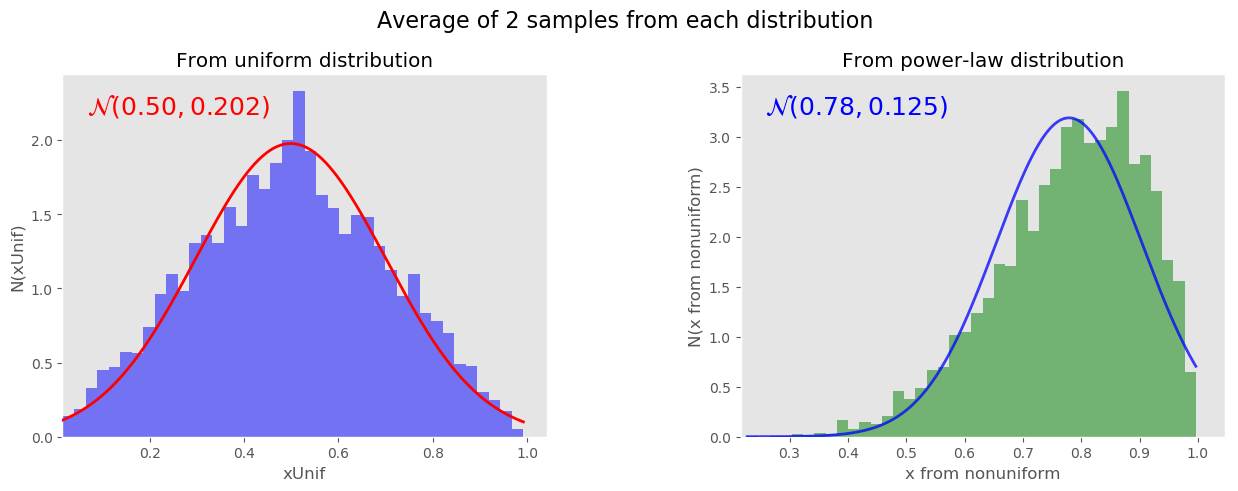

In [27]:
# how close is "close enough" to a Gaussian? Let's focus on the random uniform deviates:
aUnif2, dum2 = DrawFromRandoms(2)
aUnif3, dum3 = DrawFromRandoms(3)
aUnif4, dum4 = DrawFromRandoms(4)
aUnif6, dum5 = DrawFromRandoms(6)

ShowRandoms2(aUnif2, dum2, 2, 3.5, ShowGauss=True, nBins=40)

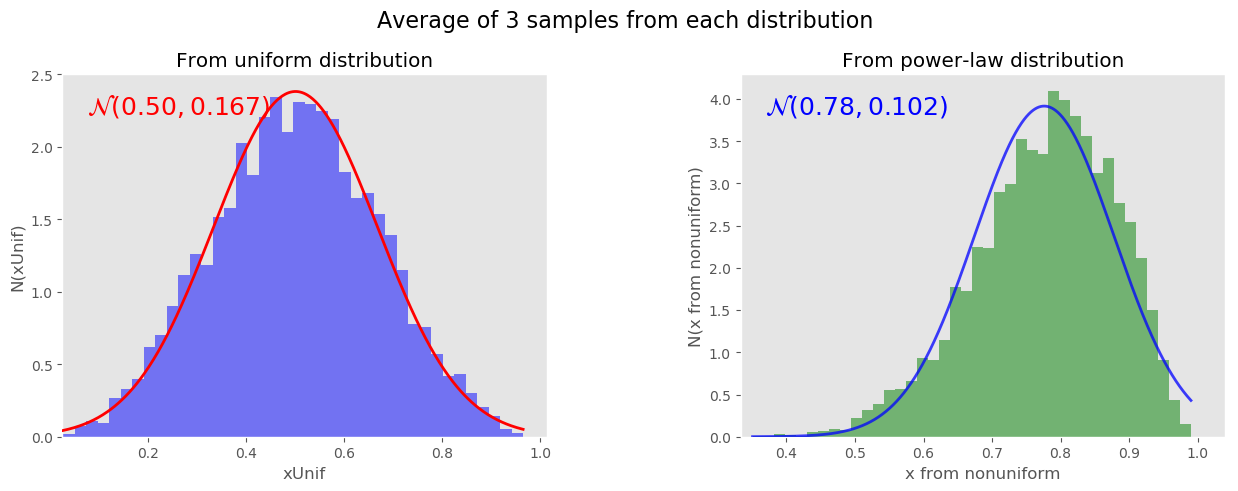

In [28]:
ShowRandoms2(aUnif3, dum3, 3, 3.5, ShowGauss=True, nBins=40)

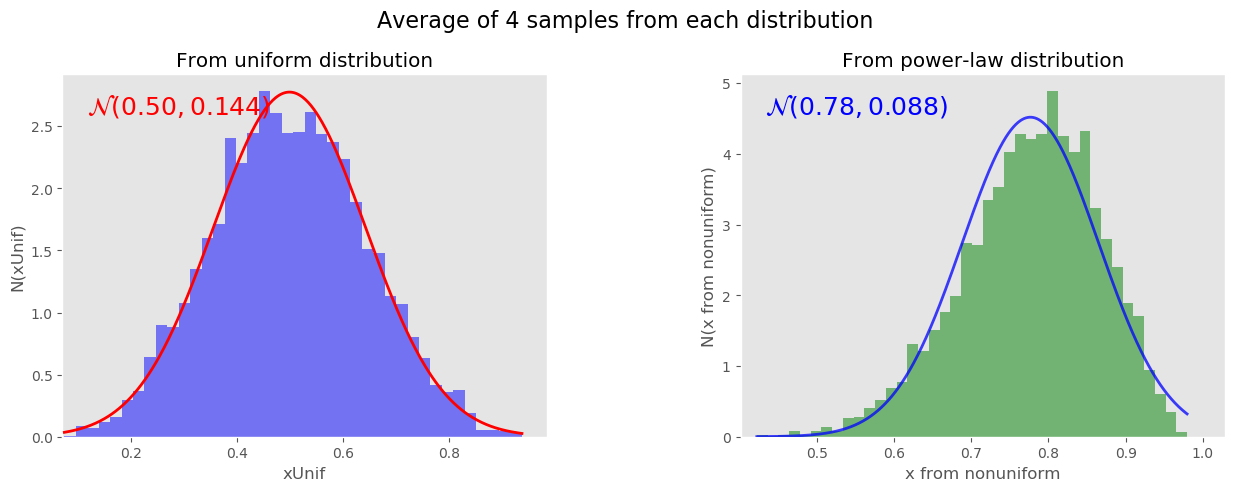

In [29]:
ShowRandoms2(aUnif4, dum4, 4, 3.5, ShowGauss=True, nBins=40)

**2 - Behavior of the averages ** - notice that the average values do not budge for either distribution. This is as we might expect - for these distributions the mean value is preserved by the addition of several samples (from the same distribution).

In [30]:
print np.mean(np.random.power(3.5, size=5000))

0.7754697550505223


**3 - Adding "measurements" from two different distributions:** - let's try adding three uniforms and three power law variates together. We'll do this by taking three samples each of the uniform and power-law samples, and adding half the samples in each case. 

In [31]:
aUnif3, aPowr3 = DrawFromRandoms(3)
aUnif2, aPowr2 = DrawFromRandoms(2)
aBoth22 = aUnif2 + aPowr2

To save typing, we'll re-use our plotting code to show what the result is doing. The supertitle at top is now inaccurate, but you know from the context what these graphs are showing.

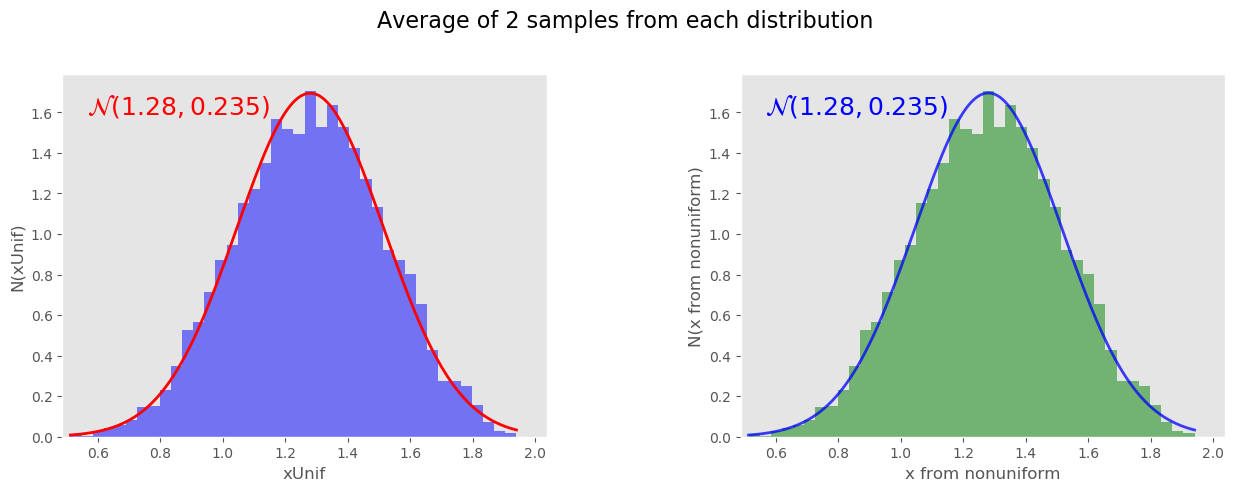

In [32]:
# for convenience, we'll re-use our plotting codes and ignore the labels:
ShowRandoms2(aBoth22, aBoth22, 2, 3.5, ShowGauss=True, nBins=40, NoTitle=True)

Something remarkable: the sum of two variates from a uniform plus two variates from the power-law is already visually close to a Gaussian!

**4 - The "measurement" gets "better" as more measurements are added.** Try running this with mSamples = 1, 5, 10, 15... (or just look at the graphs above). What happens to the standard deviation of the average about the mean as the number of samples increases?

We may see this a bit more formally later on in the summer, but note that this is exactly what you might expect. If we take 10 draws from a uniform random number between 0 and 1 and average them, the average should tend to 0.5 as mSamples $\rightarrow \infty$.

**5 - What about multiplying measurements together?** Now we try something a little different. Try multiplying a few uniform random numbers together:

In [33]:
u1 = np.random.uniform(size=5000)
u2 = np.random.uniform(size=5000)
u3 = np.random.uniform(size=5000)
u4 = np.random.uniform(size=5000)
u5 = np.random.uniform(size=5000)


z = u1 + u2 * u3 * u4 * u5



Text(0.5,1,'Product of five random uniform numbers')

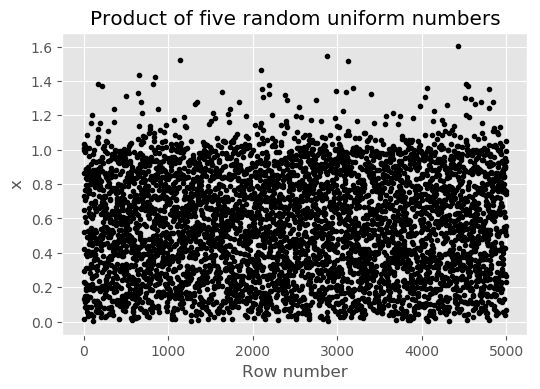

In [34]:
plt.plot(z, 'k.')
plt.xlabel('Row number')
plt.ylabel('x')
plt.title('Product of five random uniform numbers')

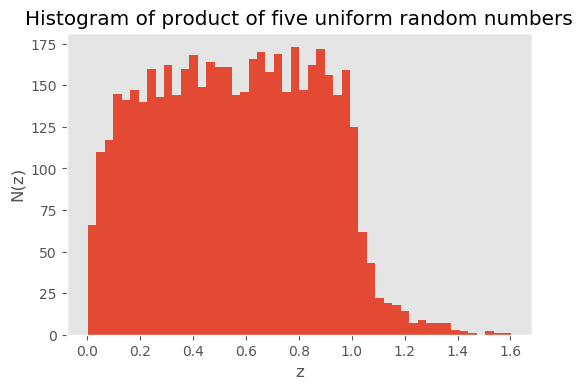

In [35]:
plt.hist(z, bins=50)
plt.xlabel('z')
plt.ylabel('N(z)')
plt.title('Histogram of product of five uniform random numbers')
plt.grid()

That doesn't look anywhere near to Gaussian. What happens if we move into log-space though?

(-3, 0.5)

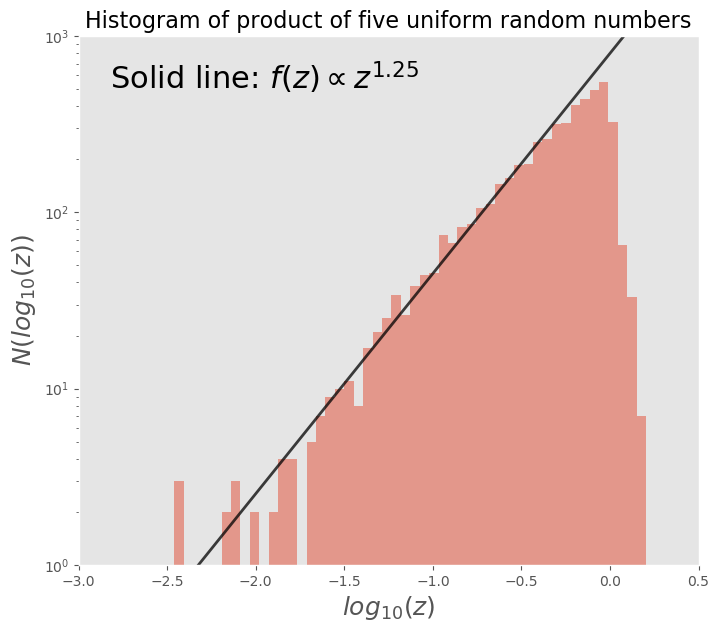

In [36]:
plt.figure(figsize=(8,7))
plt.hist(np.log10(z), bins=50, log=True, alpha=0.5)
plt.xlabel('$log_{10}(z)$', fontsize=18)
plt.ylabel('$N(log_{10}(z))$', fontsize=18)
plt.title('Histogram of product of five uniform random numbers', fontsize=16)
plt.grid()
#plt.xlim(-4,1)

# Let's see what a power law comparison looks like. (Pylab's hist() in logspace is a little funny
# to plot over, we have to recalculate in linear space and the plot remembers the settings)
lFine = np.linspace(-2.5, 0.2, 100)
plt.plot(lFine, 800. * 10.0**(lFine*1.25), 'k-', lw=2, alpha=0.75)

sAnno='Solid line: $f(z) \propto z^{1.25}$'
plt.annotate(sAnno, (0.05,0.9), xycoords='axes fraction', ha='left', color='k', fontsize=22)

plt.ylim(1., 1e3)
plt.xlim(-3,0.5)

We have accidentally discovered something else interesting - the product of uniform random numbers appears to be a power-law.

In [37]:
! pwd

/Users/clarkson/Progs/Projects/astr330_umdearborn/notebooks
